# kmeans demo

kmeans demo w/random data.  Shows:
* how to use it
* how to see the convergence withy 'random' initialization
* how scale matters

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import sklearn.datasets as ds
from sklearn.cluster import KMeans

## Create some data

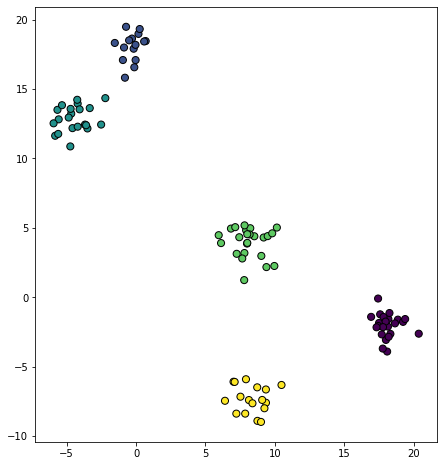

In [11]:
nc = 5  # number of clusters
n = 100  # number of dots
## create cluster centers
xc = np.random.normal(scale=10, size=nc)
yc = np.random.normal(scale=10, size=nc)
cl = np.random.choice(nc, n)  # cluster membership for each dot
## create clusters around centers
x = xc[cl] + np.random.normal(size=n)
y = yc[cl] + np.random.normal(size=n)
#
plt.figure(figsize=(8,8))
ax = plt.subplot(1,1,1)
ax.scatter(x, y, c=cl, s=50, edgecolor="k")
ax.set_aspect("equal")

## Do k-means (and plot the result in a nice way)

In [13]:
# Estimate 3 clusters
X = np.stack((x, y), axis=1)
print(X[:5,:])
km = KMeans(n_clusters=5).fit(X)

[[ 6.12585621  3.90155216]
 [18.184768   -1.57330811]
 [17.51237144 -1.85149654]
 [18.33067895 -2.64191776]
 [ 0.69455715 18.458582  ]]


In [15]:
# what are the predicted cluster labels?
hatCl = km.predict(X)  # predicted cluster membership for each dot
print("labels:\n", hatCl)
hatc = km.cluster_centers_  # cluster centroids
print("centers:\n", hatc)

labels:
 [1 2 2 2 4 1 2 4 2 4 1 3 2 0 1 1 4 2 2 3 2 2 1 1 3 3 2 1 3 4 3 2 4 1 0 0 1
 4 1 4 2 2 0 1 0 2 2 1 0 2 1 1 3 3 3 3 3 1 4 2 0 1 3 0 4 3 0 2 0 2 0 0 4 2
 0 2 1 1 0 1 0 2 3 3 1 1 4 1 4 0 3 0 0 1 0 0 3 0 4 4]
centers:
 [[-4.43124079 12.87280132]
 [ 8.15774826  3.95771856]
 [18.13723016 -2.05775192]
 [ 8.33175448 -7.34883435]
 [-0.28646442 18.05462137]]


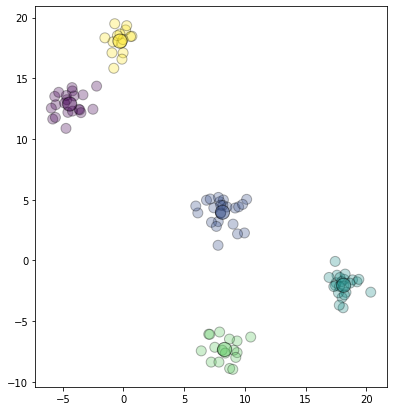

In [17]:
plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
plt.scatter(X[:,0], X[:,1], c=hatCl, alpha=0.3, s=100, edgecolor="k")
plt.scatter(hatc[:,0], hatc[:,1], c=np.unique(hatCl), 
            s=200, alpha=0.5, edgecolor="k")
ax.set_aspect("equal")

In [5]:
## compute variance within cluster
## do it in an inefficient but foolproof way
V = 0
for i in range(X.shape[0]):
    ci = hatCl[i]  # which cluster this dot goes to
    d = X[i] - hatc[ci]  # difference b/w dot and its cluster center
    V += d.T @ d
print("Total variance", V)

Total variance 1745.379688424051


### Exercise:

Loop over a range of $k$-s.  Compute the in-cluster variance.  Plot how $V$ depends on $k$.

This is called "elbow curve", it helps to find the "correct" number of clusters.

## Demonstrate how k-means starts work with random state

Note: you may want to play with the value for `random_state`

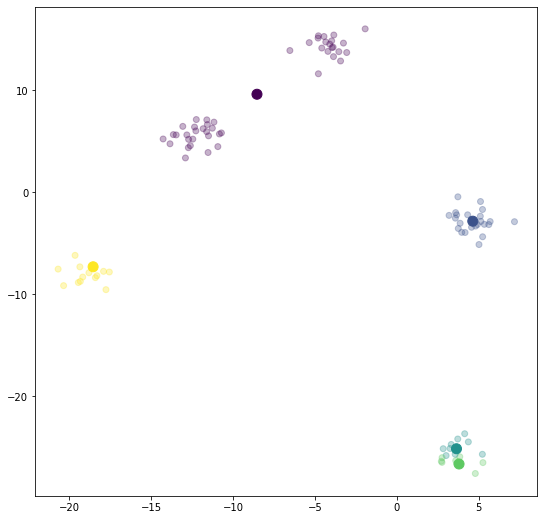

In [6]:
km1 = KMeans(5, max_iter=1, init="random", n_init=1, random_state=1)
hatCl = km1.fit(X).predict(X)
hatc = km1.cluster_centers_
plt.figure(figsize=(9,9))
plt.scatter(X[:,0], X[:,1], c=hatCl, alpha=0.3)
plt.scatter(hatc[:,0], hatc[:,1], c=np.unique(hatCl), s=100)


## Demonstrate how k-means works with wrong scale.

Let's make x1 10x smaller than x2

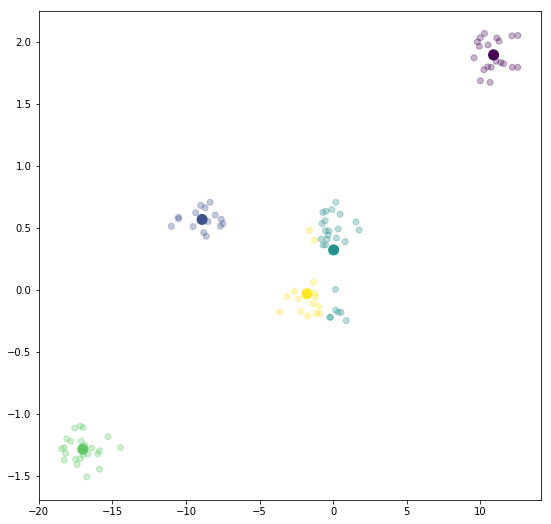

In [43]:
km1 = KMeans(5)
xx = X.copy()
xx[:,1] = xx[:,1]/10
hatY = km1.fit(xx).labels_
mu = km1.cluster_centers_
plt.figure(figsize=(9,9))
plt.scatter(xx[:,0], xx[:,1], c=hatY, alpha=0.3)
plt.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)

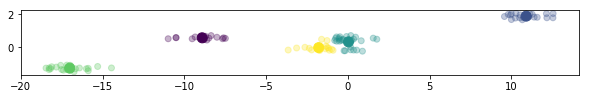

In [37]:
# look at it in the uniform scale
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax.scatter(xx[:,0], xx[:,1], c=hatY, alpha=0.3)
ax.scatter(mu[:,0], mu[:,1], c=np.unique(hatY), s=100)
ax.set_aspect("equal")

## Cluster image colors

Load image

image: (600, 800, 3)


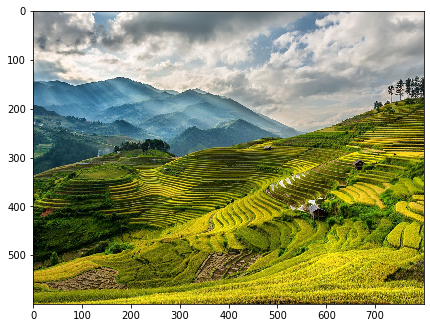

In [18]:
pixels = imread("rice-terraces.jpg")
print("image:", pixels.shape)
plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax.set_aspect("equal")
plt.imshow(pixels)

Next, cluster all the pixel color values into k clusters, replace each color value with that of the cluster center, and plot

In [22]:
k = 8
M = pixels.reshape((-1,pixels.shape[2]))
print(M.shape)
# 3 (or 4) columns, one for each color channel

(480000, 3)


center color values:
 [[125.18003065 148.91225748 158.90614441]
 [ 89.36130327  95.64865684  16.34638204]
 [ 34.75021431  45.89519805  12.82984311]
 [180.57338483 182.45361654 179.04298013]
 [205.99598495 192.27678484  30.30068022]
 [ 69.55050087 108.35356883 122.97286033]
 [144.15632154 142.09530964  23.30453011]
 [225.10476619 220.18538027 213.42133436]]


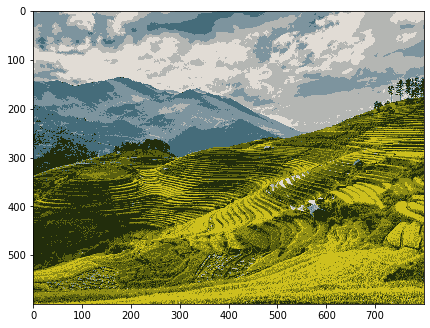

In [23]:
m = KMeans(n_clusters=k).fit(M)  # cluster the color values
cl = m.predict(M)  # find the clusters
centers = m.cluster_centers_  # find the cluster centers
print("center color values:\n", centers)
compressed = centers[cl]/255  # normalize to between 0 and 1
compressed = compressed.reshape(pixels.shape)  
# make it back to NxM array
plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax.set_aspect("equal")
plt.imshow(compressed)